In [4]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer
!pip install qiskit-ibmq-provider

  Using cached qiskit_ibmq_provider-0.20.2-py3-none-any.whl.metadata (14 kB)
  Using cached qiskit_terra-0.46.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl.metadata (938 bytes)
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [10]:
!pip install qiskit_aer

In [12]:
from qiskit_aer import Aer

In [13]:
#simulator for measuring classical bits
simulator = Aer.get_backend('qasm_simulator')

Superdense coding protocol using Qiskit

Superdense coding allows Alice to send 2 classical bits (c and d) to Bob, while transmitting only 1 qubit—because they share an entangled state.

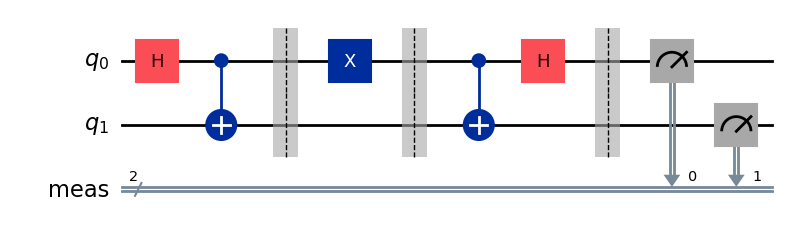

In [18]:
c = "1"
d = "0"

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output="mpl"))

Start of lab excercise
Lab 7: Implement Superdense Coding Protocol with all four bell state as e-bit

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from numpy import random, pi
import matplotlib.pyplot as plt

In [ ]:
from qiskit import QuantumCircuit , transpile
from qiskit.visualization import circuit_drawer
from IPython.display import display


In [20]:
# Helper function to prepare each Bell state
def prepare_bell_state(circ, qA, qB, state_label):
    # Start in |00>
    circ.h(qA)
    circ.cx(qA, qB)

    # Modify to desired Bell state
    if state_label == "phi_minus":    # |ϕ−⟩ = (|00⟩ - |11⟩) / √2
        circ.z(qA)
    elif state_label == "psi_plus":   # |ψ+⟩ = (|01⟩ + |10⟩) / √2
        circ.x(qB)
    elif state_label == "psi_minus":  # |ψ−⟩ = (|01⟩ - |10⟩) / √2
        circ.x(qB)
        circ.z(qA)

phi +

operation : H, CNOT

Measurement counts: {'11': 516, '00': 508}


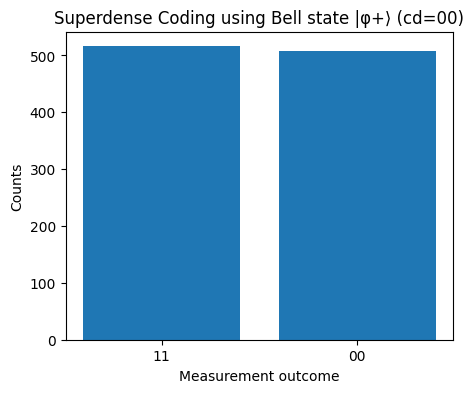

In [55]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# 1. Prepare Bell state φ+ = (|00> + |11>)/√2
def bell_phi_plus():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

qc = bell_phi_plus()

# 2. Measure
qc.measure([0, 1], [0, 1])

# 3. Simulate
backend = AerSimulator()
compiled = transpile(qc, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()

print("Measurement counts:", counts)

# 4. Histogram
labels = list(counts.keys())
values = list(counts.values())
plt.figure(figsize=(5,4))
plt.bar(labels, values)
plt.xlabel("Measurement outcome")
plt.ylabel("Counts")
plt.title("Superdense Coding using Bell state |φ+⟩ (cd=00)")
plt.show()



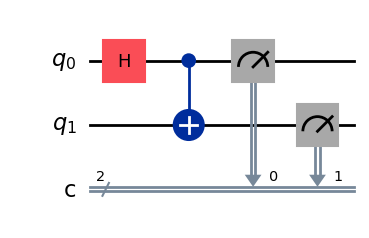

In [40]:

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])


fig = circuit_drawer(qc, output='mpl')
display(fig)


|ϕ⁻⟩ = (|00⟩ − |11⟩)/√2

Create |ϕ⁺⟩, then apply a Z on qubit 0.

operation : H, CNOT, Z

Counts (phi-): {'00': 513, '11': 511}


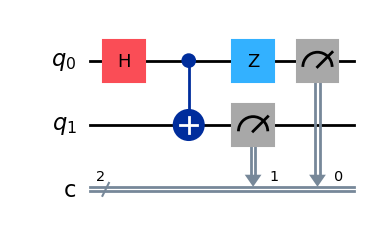

In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt

# |phi->
qc_phi_minus = QuantumCircuit(2,2)
qc_phi_minus.h(0)
qc_phi_minus.cx(0,1)
qc_phi_minus.z(0)              # phase flip
qc_phi_minus.measure([0,1],[0,1])

backend = AerSimulator()
compiled = transpile(qc_phi_minus, backend)
result = backend.run(compiled, shots=1024).result()
counts_phi_minus = result.get_counts()

print("Counts (phi-):", counts_phi_minus)

plot_histogram(counts_phi_minus)
plt.show()

# Circuit diagram
fig = qc_phi_minus.draw(output='mpl')
display(fig)


|ψ⁺⟩ = (|01⟩ + |10⟩)/√2

Create ϕ⁺ then apply X on qubit 0 (flips |00⟩→|10⟩ and |11⟩→|01⟩).

operation : H, CNOT, X

Counts (psi+): {'10': 507, '01': 517}


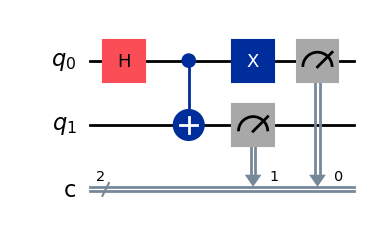

In [42]:
qc_psi_plus = QuantumCircuit(2,2)
qc_psi_plus.h(0)
qc_psi_plus.cx(0,1)
qc_psi_plus.x(0)             # bit flip
qc_psi_plus.measure([0,1],[0,1])

compiled = transpile(qc_psi_plus, backend)
result = backend.run(compiled, shots=1024).result()
counts_psi_plus = result.get_counts()

print("Counts (psi+):", counts_psi_plus)

plot_histogram(counts_psi_plus)
plt.show()

fig = qc_psi_plus.draw(output='mpl')
display(fig)


|ψ⁻⟩ = (|01⟩ − |10⟩)/√2

Start from ϕ⁺, then apply X and Z to qubit 0

operation : H, CNOT, X, Z

Counts (psi-): {'10': 510, '01': 514}


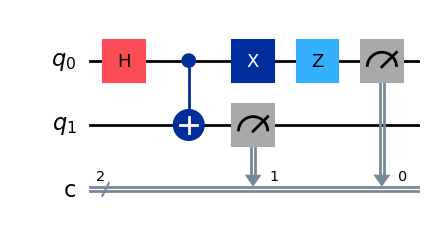

In [47]:
qc_psi_minus = QuantumCircuit(2,2)
qc_psi_minus.h(0)
qc_psi_minus.cx(0,1)
qc_psi_minus.x(0)
qc_psi_minus.z(0)            # adds the phase
qc_psi_minus.measure([0,1],[0,1])

compiled = transpile(qc_psi_minus, backend)
result = backend.run(compiled, shots=1024).result()
counts_psi_minus = result.get_counts()

print("Counts (psi-):", counts_psi_minus)

plot_histogram(counts_psi_minus)
plt.show()

fig = qc_psi_minus.draw(output='mpl')
display(fig)




|ϕ+⟩ counts: {'11': 496, '00': 528}
|ϕ-⟩ counts: {'00': 509, '11': 515}
|ψ+⟩ counts: {'10': 502, '01': 522}
|ψ-⟩ counts: {'01': 525, '10': 499}


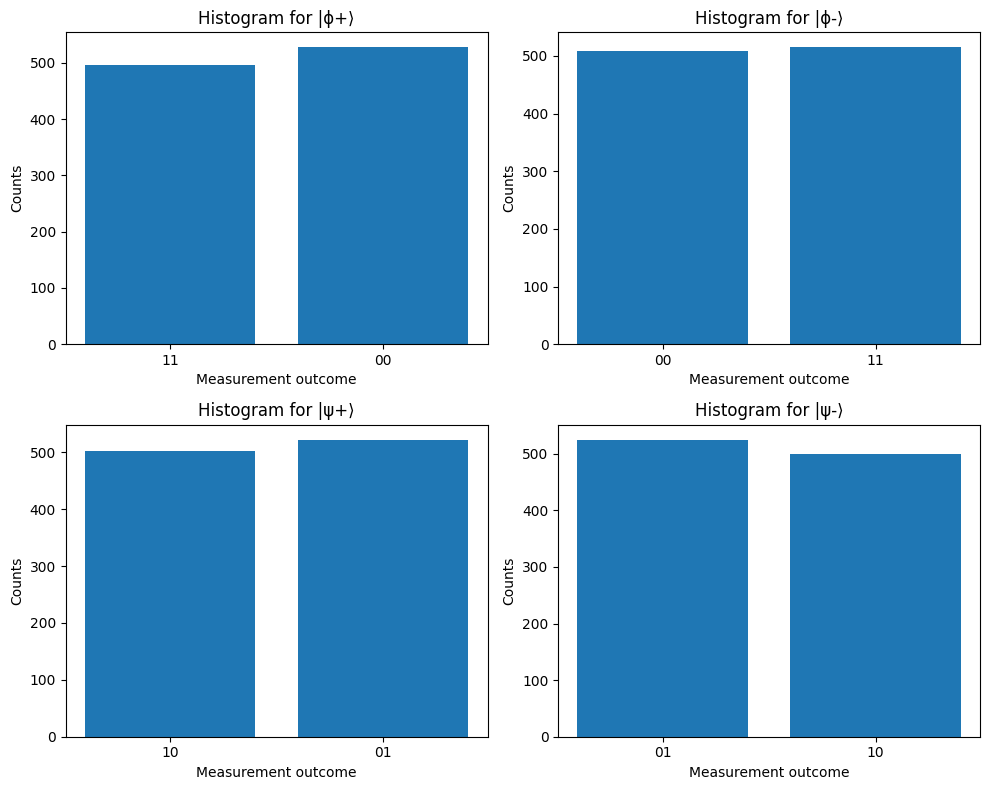

In [56]:


backend = AerSimulator()

def bell_phi_plus():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure([0,1],[0,1])
    return qc

def bell_phi_minus():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)
    qc.measure([0,1],[0,1])
    return qc

def bell_psi_plus():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.x(0)
    qc.measure([0,1],[0,1])
    return qc

def bell_psi_minus():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.x(0)
    qc.z(0)
    qc.measure([0,1],[0,1])
    return qc

states = {
    "|ϕ+⟩": bell_phi_plus(),
    "|ϕ-⟩": bell_phi_minus(),
    "|ψ+⟩": bell_psi_plus(),
    "|ψ-⟩": bell_psi_minus()
}

results = {}

# Run simulations
for name, qc in states.items():
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=1024).result()
    counts = result.get_counts()
    results[name] = counts
    print(f"{name} counts:", counts)

# Plot all histograms in one figure
plt.figure(figsize=(10, 8))

for i, (name, counts) in enumerate(results.items(), start=1):
    labels = list(counts.keys())
    values = list(counts.values())

    plt.subplot(2, 2, i)
    plt.bar(labels, values)
    plt.title(f"Histogram for {name}")
    plt.xlabel("Measurement outcome")
    plt.ylabel("Counts")

plt.tight_layout()
plt.show()


Running the  simulator shows that Alice and Bob's classical bits or quantum bit always agree.

In [50]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Prepare Bell state |ϕ+> = (|00> + |11>)/√2
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

backend = AerSimulator()
compiled = transpile(qc, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()

print("Measurement results:", counts)

# Check agreement
agree = 0
disagree = 0

for outcome, count in counts.items():
    if outcome[0] == outcome[1]:
        agree += count
    else:
        disagree += count

print(f"Alice and Bob agree: {agree} times")
print(f"Alice and Bob disagree: {disagree} times")


Measurement results: {'11': 514, '00': 510}
Alice and Bob agree: 1024 times
Alice and Bob disagree: 0 times


 in Superdense Coding

Alice encodes 2 classical bits into 1 qubit

Bob decodes using a fixed circuit
all the histograms show no disagrement

Message sent (c,d) = (1, 0)
Measurement statistics: {'10': 1024}


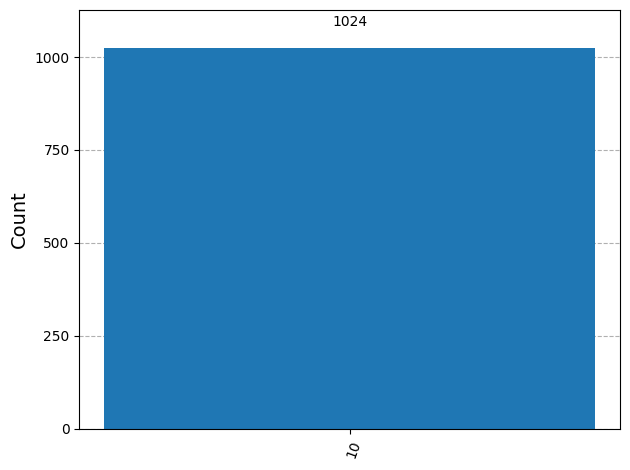

In [53]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# classical bits
c = 1
d = 0

# Superdense coding circuit
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

# 2. Alice encodes message using X (for c) and Z (for d)
if d == 1:
    qc.z(0)
if c == 1:
    qc.x(0)

# 3. Bob decodes
qc.cx(0, 1)
qc.h(0)

# 4. Measure (A -> bit0, B -> bit1)
qc.measure([0,1], [0,1])


backend = AerSimulator()
compiled = transpile(qc, backend)
result = backend.run(compiled, shots=1024).result()
statistics = result.get_counts()

print("Message sent (c,d) =", (c,d))
print("Measurement statistics:", statistics)

display(plot_histogram(statistics))


Sent 00  →  Measured: {'00': 1024}


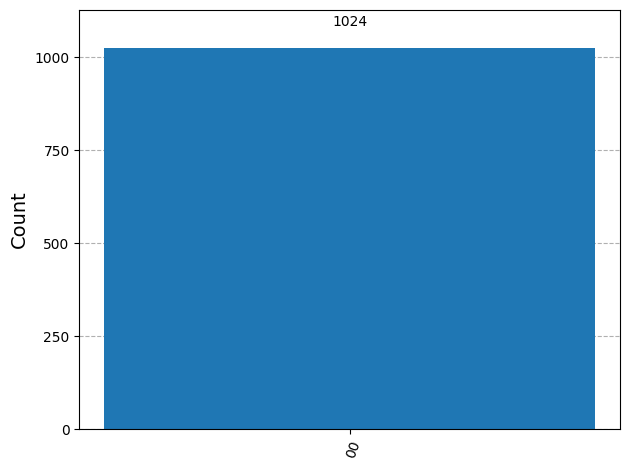

Sent 01  →  Measured: {'01': 1024}


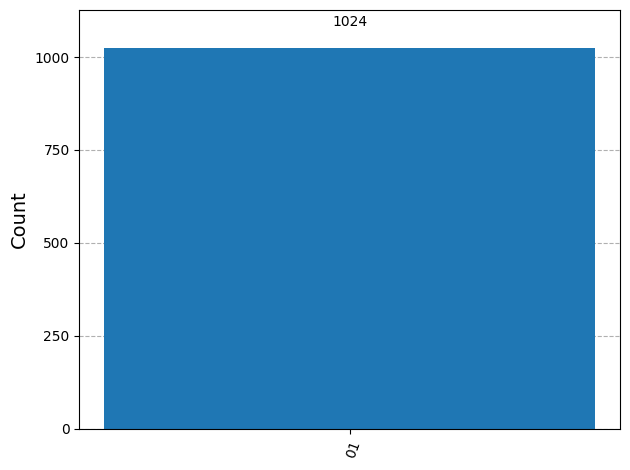

Sent 10  →  Measured: {'10': 1024}


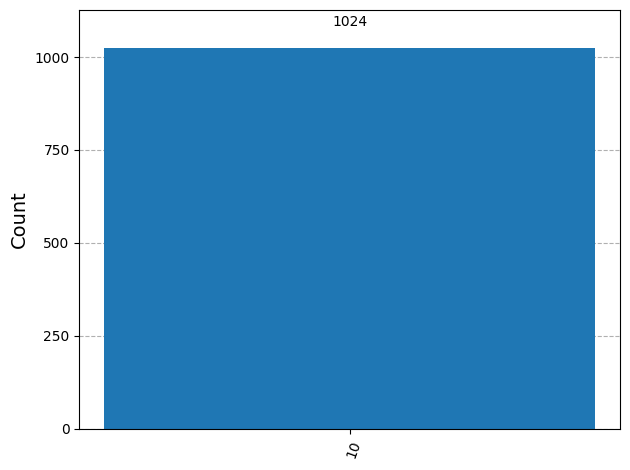

Sent 11  →  Measured: {'11': 1024}


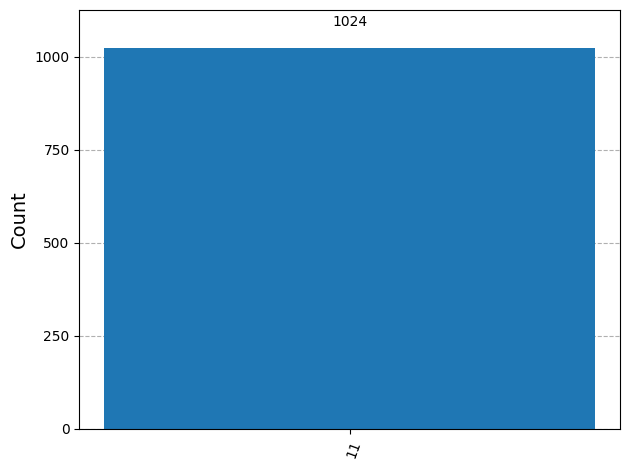

In [54]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

messages = [(0,0),(0,1),(1,0),(1,1)]
results = {}

for (c,d) in messages:
    qc = QuantumCircuit(2, 2)

    # Bell state
    qc.h(0)
    qc.cx(0, 1)

    # Encode
    if d == 1:
        qc.z(0)
    if c == 1:
        qc.x(0)

    # Decode
    qc.cx(0, 1)
    qc.h(0)

    qc.measure([0,1],[0,1])

    backend = AerSimulator()
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=1024).result()
    results[(c,d)] = result.get_counts()

    print(f"Sent {c}{d}  →  Measured:", results[(c,d)])
    display(plot_histogram(results[(c,d)]))
